In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
labels = os.listdir("train")
labels

['Closed', 'Open']

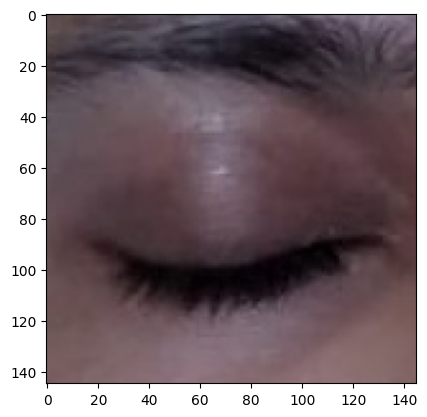

In [3]:
plt.imshow(plt.imread("train/Closed/_0.jpg"))

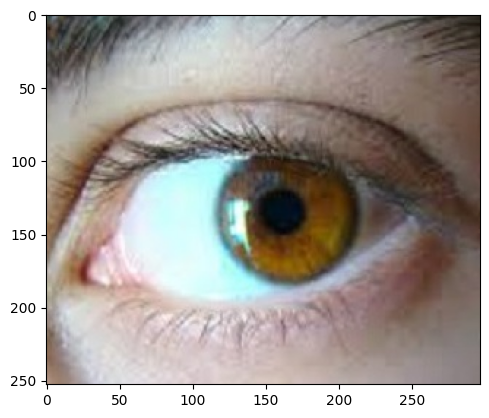

In [4]:
plt.imshow(plt.imread("train/Open/_10.jpg"))

In [5]:
X = []
Y = []

In [6]:
# Load Open Eyes images
for i in tqdm(glob('train/Open/*')):
    temp = np.array(Image.open(i).resize((64, 64)).convert('L'))  # Convert to grayscale
    X.append(temp)
    Y.append(1)

# Load Closed Eyes images
for i in tqdm(glob('train/Closed/*')):
    temp = np.array(Image.open(i).resize((64, 64)).convert('L'))  # Convert to grayscale
    X.append(temp)
    Y.append(0)

100%|███████████████████████████████████████████████████████████████████████████████| 904/904 [00:06<00:00, 137.66it/s]


In [7]:
X = np.array(X)
X

array([[[ 78,  84,  86, ..., 130, 130, 131],
        [ 79,  83,  88, ..., 136, 138, 132],
        [ 83,  85,  89, ..., 137, 139, 136],
        ...,
        [103, 107, 110, ..., 111, 110, 107],
        [104, 108, 110, ..., 110, 109, 106],
        [105, 108, 110, ..., 110, 108, 106]],

       [[182, 178, 138, ..., 219, 219, 218],
        [185, 162, 112, ..., 219, 218, 217],
        [172, 126,  84, ..., 218, 218, 217],
        ...,
        [224, 226, 218, ..., 205, 206, 208],
        [226, 227, 219, ..., 205, 206, 208],
        [228, 229, 219, ..., 206, 207, 209]],

       [[ 87, 102,  75, ...,  52,  46,  40],
        [ 79,  81,  65, ...,  45,  40,  35],
        [ 61,  68,  50, ...,  46,  48,  44],
        ...,
        [131, 126, 130, ..., 133, 131, 128],
        [140, 132, 133, ..., 134, 131, 128],
        [150, 137, 135, ..., 134, 131, 128]],

       ...,

       [[203, 204, 202, ..., 103, 101,  85],
        [200, 204, 205, ..., 105, 101,  90],
        [200, 197, 196, ..., 110,  99,  93

In [8]:
X = X/255.0

In [9]:
Y = np.array(Y) #1 IS OPEN, 0 IS CLOSED
Y

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
X.shape

(1630, 64, 64)

In [11]:
X = np.expand_dims(X,-1) # 1 MORE DIMESINSION TO STORE OUTPUIT

In [12]:
X.shape

(1630, 64, 64, 1)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [15]:
model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [16]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [18]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=16, callbacks=[callback,early_stopping])

Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7221 - loss: 0.6157
Epoch 1: val_loss improved from inf to 0.66095, saving model to bestModel.keras
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7227 - loss: 0.6146 - val_accuracy: 0.5799 - val_loss: 0.6609
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8770 - loss: 0.3021
Epoch 2: val_loss did not improve from 0.66095
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.8771 - loss: 0.3020 - val_accuracy: 0.4429 - val_loss: 0.7006
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8883 - loss: 0.2723
Epoch 3: val_loss did not improve from 0.66095
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8882 - loss: 0.2726 - val_accuracy: 0.5936 - val_loss: 0.8717
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9083 - loss: 0.2256
Epoch 4: val_loss did not improve from 0.66095
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9086 - loss: 0.2250 - val_accuracy: 0

In [19]:
model.evaluate(x_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9582 - loss: 0.1276


[0.1291997730731964, 0.9628252983093262]

In [21]:
from keras.models import load_model
best_model = load_model('bestModel.keras')
best_model.evaluate(x_test, y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9705 - loss: 0.0850


[0.0874628871679306, 0.9721189737319946]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


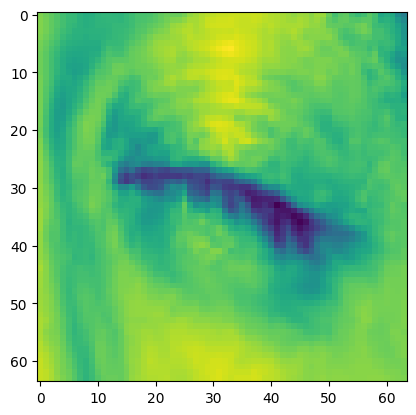

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


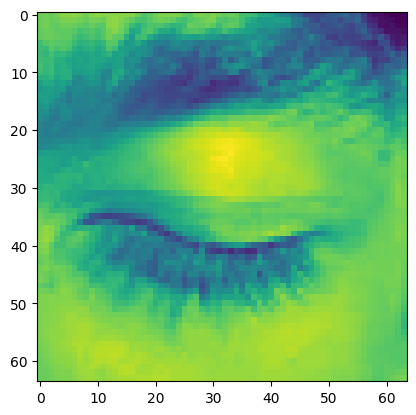

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


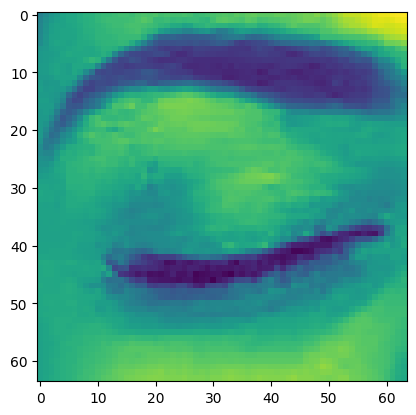

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


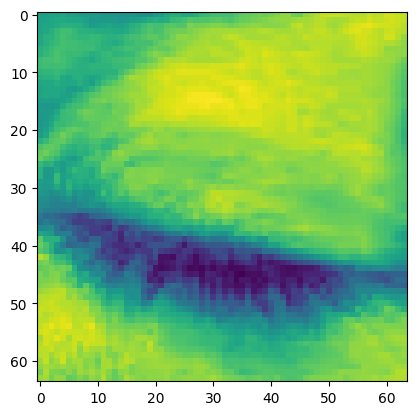

Closed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


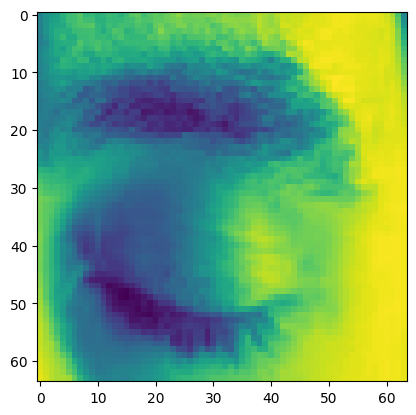

Closed


In [22]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


Text(0.5, 25.722222222222214, 'Actual')

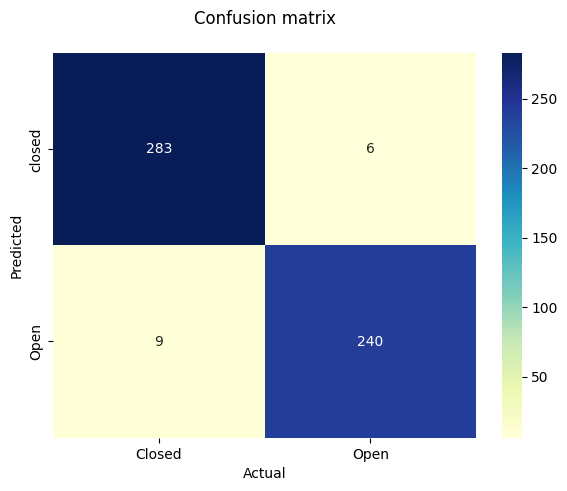

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.50).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [24]:
8/719 * 100

1.1126564673157162

In [25]:
from keras.models import load_model
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [26]:
import pydot
import os

# Check if pydot is installed
print("pydot installed:", pydot.__version__)

pydot installed: 3.0.2


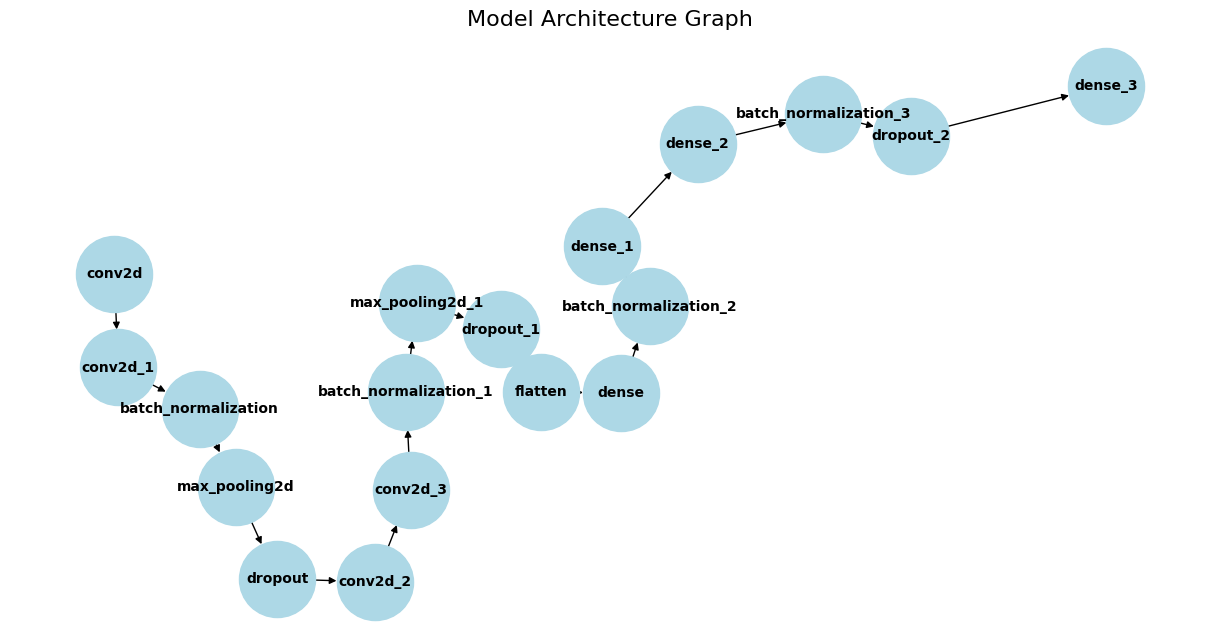

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_model_with_networkx(model):
    G = nx.DiGraph()

    # Add layers to the graph
    for layer in model.layers:
        G.add_node(layer.name)

    # Add edges (connections between layers)
    for i in range(len(model.layers) - 1):
        G.add_edge(model.layers[i].name, model.layers[i + 1].name)

    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='black')
    
    plt.title("Model Architecture Graph", fontsize=16)
    plt.show()

# Example usage
plot_model_with_networkx(best_model)

In [28]:
image_path = 'ttt.png'
temp = np.array(Image.open(image_path).resize((64, 64)).convert('L'))  # Resize and convert to grayscale
print(f"Processed image shape: {temp.shape}")

Processed image shape: (64, 64)


In [ ]:
temp

In [ ]:
temp = temp / 255.0
temp

In [ ]:
temp = np.expand_dims(temp,-1)
print(f"Processed image shape: {temp.shape}")

In [ ]:
result = best_model.predict(np.expand_dims(temp,0))
if result > 0.5:
    print('Open')
else:
    print("Closed")